In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns

#Load the data from "Diabete.csv" which contains data about the factors affecting the likelihood of Diabetes. We have used "Blood Pressure" factor here to model our data into Poisson Distribution.

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#Pop columns

In [23]:
df.pop('Pregnancies')
df.pop('SkinThickness')
df.pop('Insulin')
df.pop('BMI')
df.pop('DiabetesPedigreeFunction')

0      0.627
1      0.351
2      0.672
3      0.167
4      2.288
       ...  
763    0.171
764    0.340
765    0.245
766    0.349
767    0.315
Name: DiabetesPedigreeFunction, Length: 768, dtype: float64

In [24]:
df

,Glucose,BloodPressure,Age,Outcome
0,148,72,50,1
1,85,66,31,0
2,183,64,32,1
3,89,66,21,0
4,137,40,33,1
...,...,...,...,...
763,101,76,63,0
764,122,70,27,0
765,121,72,30,0
766,126,60,47,1


In [78]:
# PLOT FOR THE BLOOD PRESSURE WHICH FOLLOWS POISSON DISTRIBUTION and Lambda is set to 1

Text(0.5, 1.0, 'Blood Pressure of Patients')

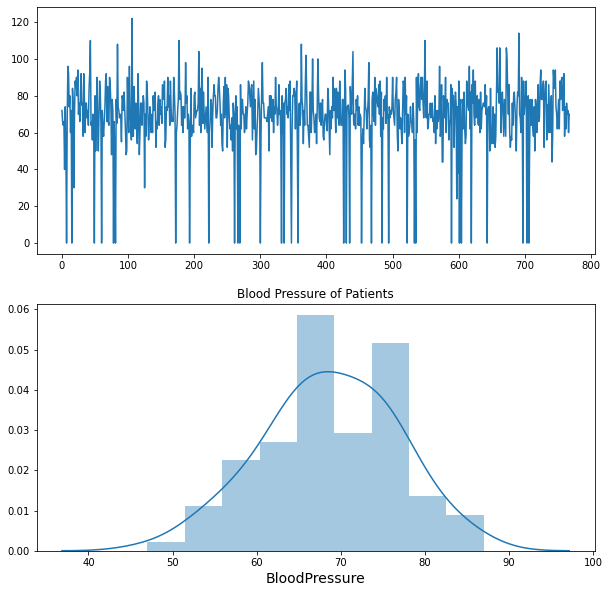

In [26]:
import matplotlib.pyplot as plt
from pymc3 import Poisson
from scipy.stats import poisson
from scipy import stats

poisson_pd = poisson.pmf(df['BloodPressure'], 1)
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].plot(df['BloodPressure'])
sns.distplot(poisdata)
plt.xlabel("BloodPressure", fontsize='14')
plt.title("Blood Pressure of Patients")

In [79]:
# Function for Poisson distribution

In [8]:
poisson_like = lambda x, lam: np.exp(-lam) * (lam**x) / (np.arange(x)+1).prod()

In [80]:
# probability distribution for different values of bloodPressure with lambda = 1

In [9]:
lam = 1
probs = [poisson_like(xi, lam) for xi in {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13}]
probs 

[0.36787944117144233,
 0.18393972058572117,
 0.06131324019524039,
 0.015328310048810098,
 0.0030656620097620196,
 0.0005109436682936699,
 7.299195261338141e-05,
 9.123994076672677e-06,
 1.0137771196302974e-06,
 1.0137771196302975e-07,
 9.216155633002704e-09,
 1.9040851633239363e-10]

In [82]:
# likelihood function

In [69]:
np.prod(probs)

1.1964870271761878e-50

In [89]:
# THE BELOW GRAPH shows that the value for lamda=1 is the most likely to occur.

Text(0, 0.5, 'L($\\lambda$|x=5)')

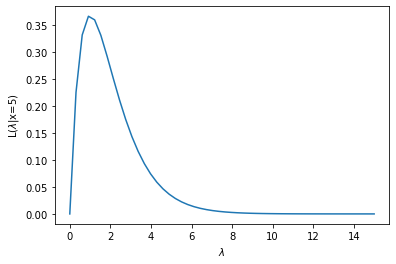

In [73]:
lambdas = np.linspace(0,15)

plt.plot(lambdas, [poisson_like(bp_data.any(), l) for l in lambdas])
plt.xlabel('$\lambda$')
plt.ylabel('L($\lambda$|x={0})'.format(_x))

In [86]:
#PYMC3

In [91]:
import pymc3 as pm
n_samples = 100

bp_data = df['BloodPressure'].tolist()
with pm.Model() as our_first_model:
    lam = 1
    y = pm.Poisson('y', lam, observed=bp_data)
    trace = pm.sample(100)


You can find the C code in this temporary file: C:\Users\jaspr\AppData\Local\Temp\theano_compilation_error_incmgo83


Exception: ('Compilation failed (return status=1): C:\\Users\\jaspr\\AppData\\Local\\Theano\\compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_69_Stepping_1_GenuineIntel-3.8.3-64\\tmpflnvadl2\\mod.cpp:1:0: sorry, unimplemented: 64-bit mode not compiled in\r.  #include <Python.h>\r.  \r. ', 'FunctionGraph(Elemwise{floor,no_inplace}(TensorConstant{1.0}))')